In [6]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [50]:
#reading file
data = pd.read_csv ('http://bit.ly/w-data')


In [39]:
#showing all data
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
# testing is there any null data
data.isnull == True

False

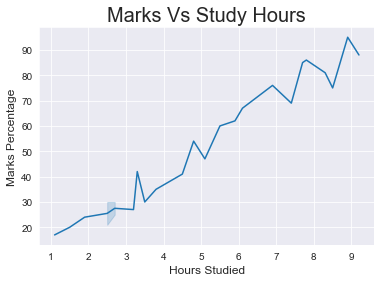

In [28]:
#plotting the data as linear
sns.set_style('darkgrid')
sns.lineplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

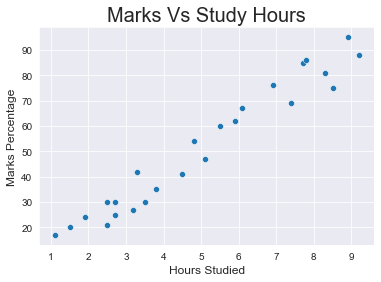

In [29]:
#plotting data as points or scatter
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

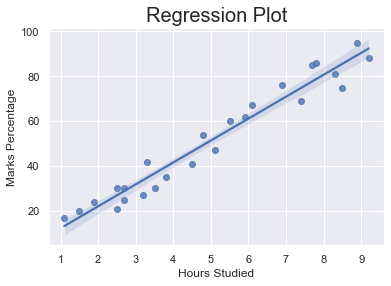

In [30]:
#plotting the liear regression
sns.set_theme(color_codes=True)
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


In [15]:
#seeeing if there is correlation between data 
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [16]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [44]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [32]:
train_X

array([[7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [33]:
train_y

array([86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21, 54, 95,
       41], dtype=int64)

In [17]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


In [18]:
val_X

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9],
       [3.8],
       [1.9]])

In [19]:
 val_y

array([20, 27, 69, 30, 62, 35, 24], dtype=int64)

In [51]:

predict_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in predict_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [52]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': predict_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [53]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': predict_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


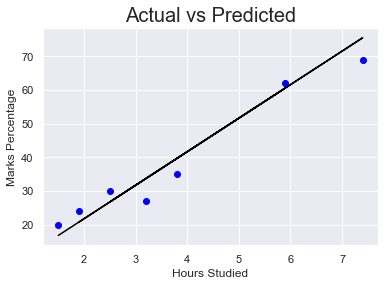

In [54]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, predict_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [55]:
print('Mean absolute error: ',mean_absolute_error(val_y,predict_y))

Mean absolute error:  4.130879918502486


In [56]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893
